# Understand Embedding layer

## Reformatting embedding activations shape

Using flatten and reshape

In [1]:
import keras
import pandas as pd
import numpy as np

from keras.models import Sequential
from keras.layers import *

In [2]:
model = keras.models.load_model('./models/bycountry_model')
new_model = Sequential()
new_model.add(model.layers[0])
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 64)           640000    
                                                                 
Total params: 640,000
Trainable params: 640,000
Non-trainable params: 0
_________________________________________________________________


In [3]:
model.layers[0].output_shape

(None, 100, 64)

In [4]:
model.layers[0].output_shape[-1]

64

In [5]:
df = pd.read_json('./data/bycountry_ds.json')
df.head()

,category,input,output_low,output_medium,output_high
http://dbpedia.org/resource/...All_the_Marbles,[United States],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,1,0
http://dbpedia.org/resource/An_Eye_for_an_Eye_(1981_film),[United States],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,1,0
http://dbpedia.org/resource/Brain_Dead_(1990_film),[United States],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,1,0
http://dbpedia.org/resource/For_Pete's_Sake_(film),[United States],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,1,0
http://dbpedia.org/resource/Hannah_Montana:_The_Movie,[United States],"[25, 6677, 48, 2, 138, 5, 331, 1, 7, 25, 6983,...",0,0,1


In [6]:
category = "France"
dfc = df[df.category.apply(lambda x: category in x)]
dfc.shape

(1725, 5)

In [7]:
# inputs = [x for x in dfc.input]
inputs = [x for x in df.input]
activations = new_model.predict(inputs)
activations.shape

544/544 [==============================] - 2s 3ms/step


(17403, 100, 64)

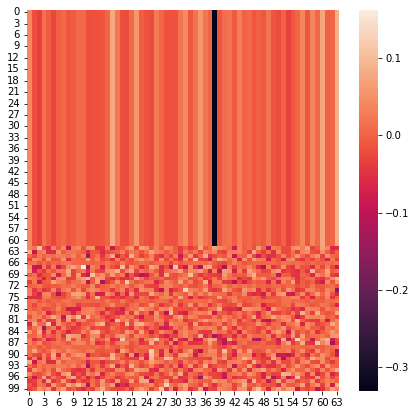

In [13]:
plt.figure(figsize=(7,7))
sns.heatmap(activations[0])
plt.show()

In [15]:
emb_activations_arr = [a.flatten() for a in activations]
emb_activations_arr = np.array(emb_activations_arr)
emb_activations_arr.shape

(17403, 6400)

In [16]:
acts = []
for i in range(len(emb_activations_arr)):
    acts.append(pd.DataFrame(pd.DataFrame(emb_activations_arr[i].reshape(-1, 64)).mean()).T)

In [17]:
np.array(acts).shape

(17403, 1, 64)

In [18]:
np.array(acts).reshape(-1, 64).shape

(17403, 64)

In [19]:
activations = np.array(acts).reshape(-1, 64)

In [24]:
activations.shape

(17403, 64)

In [20]:
new_df = pd.DataFrame()
new_df['category'] = df.category

for neuron_index, value_list in enumerate(activations.T):
    index = f"neuron_{neuron_index}"
    new_df[index] = value_list

In [184]:
new_df

,category,neuron_0,neuron_1,neuron_2,neuron_3,neuron_4,neuron_5,neuron_6,neuron_7,neuron_8,...,neuron_54,neuron_55,neuron_56,neuron_57,neuron_58,neuron_59,neuron_60,neuron_61,neuron_62,neuron_63
http://dbpedia.org/resource/...All_the_Marbles,[United States],0.026985,-0.015238,-0.021052,0.007074,-0.005766,-0.017079,-0.001053,0.006684,-0.003012,...,-0.006989,0.002157,0.025338,-0.009401,0.023708,0.004595,0.045909,0.006806,-0.001646,0.052117
http://dbpedia.org/resource/An_Eye_for_an_Eye_(1981_film),[United States],0.031226,-0.013217,-0.024129,0.006207,-0.005198,-0.021103,-0.003310,0.009972,-0.004687,...,-0.006023,-0.001974,0.028632,-0.011438,0.033693,0.000792,0.057531,-0.001538,0.000586,0.062678
http://dbpedia.org/resource/Brain_Dead_(1990_film),[United States],0.031748,-0.016758,-0.028573,0.014320,-0.005401,-0.025799,-0.001363,0.004758,-0.007949,...,-0.012610,0.001675,0.032481,-0.009969,0.028664,0.004842,0.064074,0.001343,-0.000101,0.072928
http://dbpedia.org/resource/For_Pete's_Sake_(film),[United States],0.031970,-0.017894,-0.025495,0.007313,-0.005983,-0.022870,-0.002600,0.007897,-0.009539,...,-0.009829,0.001833,0.029032,-0.011639,0.031221,0.004248,0.060300,0.000455,0.003206,0.071361
http://dbpedia.org/resource/Hannah_Montana:_The_Movie,[United States],-0.005255,0.006162,0.009041,0.002351,-0.001275,-0.010666,-0.001064,0.005175,-0.006191,...,0.005615,-0.012881,-0.012657,0.005924,0.001591,-0.003199,-0.005297,0.003148,-0.002802,0.003813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
http://dbpedia.org/resource/Women_on_the_Run_(film),[Czech Republic],0.024830,-0.011297,-0.018525,0.001084,-0.001139,-0.025449,0.005337,0.012610,-0.015827,...,-0.002395,-0.004889,0.015330,-0.002380,0.038804,-0.002020,0.045420,-0.009161,0.005593,0.069472
http://dbpedia.org/resource/Dice_Rules_(1991_film),[United States],0.035275,-0.016681,-0.030828,0.012186,-0.005096,-0.024294,-0.001716,0.006635,-0.011671,...,-0.010723,0.002143,0.031709,-0.011678,0.035043,0.002617,0.068655,-0.002009,0.002273,0.078019
http://dbpedia.org/resource/The_Wishmas_Tree,[Australia],0.033722,-0.022738,-0.026596,0.013953,-0.016981,-0.011739,-0.005654,0.001084,0.001350,...,-0.011823,0.009156,0.020688,-0.011388,0.019017,0.010067,0.052397,0.011891,-0.008190,0.046966
http://dbpedia.org/resource/Princess_Emmy,"[Belgium, Germany, United Kingdom]",0.032610,-0.016144,-0.029452,0.009979,-0.011518,-0.019552,-0.009303,0.005541,-0.005738,...,-0.010241,0.005104,0.033029,-0.012801,0.027851,0.009134,0.055392,0.002974,-0.004306,0.062219


In [185]:
new_df[new_df.category.apply(lambda x: 'France' in x)]

,category,neuron_0,neuron_1,neuron_2,neuron_3,neuron_4,neuron_5,neuron_6,neuron_7,neuron_8,...,neuron_54,neuron_55,neuron_56,neuron_57,neuron_58,neuron_59,neuron_60,neuron_61,neuron_62,neuron_63
http://dbpedia.org/resource/Molière_(2007_film),[France],0.024225,-0.016421,-0.024753,0.009824,-0.004373,-0.020740,-0.001974,0.006031,-0.002110,...,-0.009206,0.001076,0.024691,-0.008845,0.030182,0.003061,0.056267,0.001927,0.001256,0.060582
http://dbpedia.org/resource/RocknRolla,"[France, United Kingdom, United States, ]",0.022262,-0.009037,-0.014925,0.004477,-0.004497,-0.015508,-0.000909,0.011236,-0.010539,...,-0.003076,-0.001610,0.021055,-0.008711,0.025757,0.001543,0.041430,-0.002935,0.002251,0.052531
http://dbpedia.org/resource/Certified_Copy_(film),"[Belgium, France, Italy, ]",0.022582,-0.017330,-0.014256,0.005920,-0.008610,-0.014327,-0.006185,0.010376,-0.001783,...,-0.001336,0.000475,0.019132,-0.008545,0.023399,0.007621,0.032884,0.002899,0.004530,0.037658
http://dbpedia.org/resource/Dumas_(film),[France],0.031499,-0.017578,-0.027993,0.007483,-0.004826,-0.020159,-0.004862,0.008790,-0.008241,...,-0.009166,0.001140,0.031314,-0.011360,0.035712,0.004794,0.061476,-0.001566,0.000948,0.073243
http://dbpedia.org/resource/On_Tour_(2010_film),"[France, Germany]",0.013971,-0.005276,-0.008409,0.000660,-0.006196,-0.012266,-0.009638,0.003387,-0.002248,...,0.000942,-0.000126,0.006690,-0.004221,0.011300,-0.000196,0.030190,-0.000201,-0.004479,0.010641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
http://dbpedia.org/resource/Marona's_Fantastic_Tale,[France],0.028173,-0.015330,-0.026294,0.011230,-0.009801,-0.016179,-0.003607,0.009143,-0.008234,...,-0.009392,0.002126,0.024986,-0.010023,0.029587,0.006552,0.056867,0.000091,-0.000900,0.066703
http://dbpedia.org/resource/Notturno_(film),"[France, Germany, Italy, ]",0.034488,-0.018129,-0.030120,0.013397,-0.008986,-0.020238,-0.005157,0.005324,-0.007906,...,-0.011501,0.004801,0.028444,-0.013761,0.028249,0.009798,0.058184,0.003854,-0.002996,0.066356
http://dbpedia.org/resource/Only_the_Animals_(film),[France],0.035553,-0.017454,-0.029837,0.010786,-0.003964,-0.025269,-0.001704,0.007829,-0.010971,...,-0.008143,-0.000075,0.030387,-0.010950,0.038049,0.004226,0.066041,-0.001801,0.002371,0.077813
http://dbpedia.org/resource/The_Sonata,"[France, Latvia, Russia, United Kingdom, Unite...",0.025322,-0.015988,-0.025160,0.011735,-0.004270,-0.021751,-0.000386,0.004542,-0.004049,...,-0.011316,0.003268,0.025062,-0.010114,0.027112,0.003996,0.048417,0.000490,-0.000791,0.055962


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

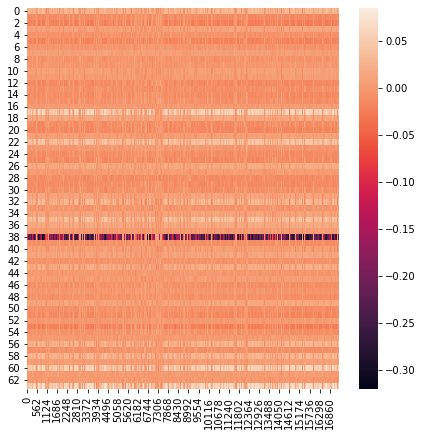

In [22]:
plt.figure(figsize=(7,7))
sns.heatmap(activations.T)
plt.show()

In [23]:
plt.figure(figsize=(7,7))
sns.heatmap(emb_activations.T)
plt.show()

NameError: name 'emb_activations' is not defined

<Figure size 504x504 with 0 Axes>

In [148]:
test_model = Sequential()
test_model.add(model.layers[0])
test_model.add(model.layers[1])
test_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 64)           640000    
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
Total params: 652,416
Trainable params: 652,416
Non-trainable params: 0
_________________________________________________________________


In [149]:
test_activations = test_model.predict(inputs)

544/544 [==============================] - 4s 6ms/step


In [153]:
test_activations.shape, test_activations.T.shape

((17403, 32), (32, 17403))

In [150]:
test_df = pd.DataFrame()
for neuron_index, value_list in enumerate(test_activations.T):
    index = f"neuron_{neuron_index}"
    test_df[index] = value_list
    print(value_list)

[ 0.07156485 -0.02730321  0.17597727 ...  0.45771903  0.2850686
 -0.13035586]
[ 0.292121    0.11424701  0.23239158 ...  0.4332017   0.39111367
 -0.09148991]
[-0.36352202 -0.10647444 -0.28580275 ... -0.50327903 -0.44341838
  0.04466944]
[-0.17308226  0.02942712 -0.1778004  ... -0.35151663 -0.2639377
  0.10422608]
[ 0.02260085  0.18889399 -0.00607158 ... -0.03383346  0.00093255
  0.1771774 ]
[-0.37807608 -0.13219558 -0.30093846 ... -0.5402119  -0.4922204
 -0.04076031]
[-0.10571943 -0.15675917 -0.00709486 ... -0.03011121 -0.05231711
 -0.1427558 ]
[ 0.2762183  -0.06076454  0.35801288 ...  0.5348451   0.4836164
 -0.19332807]
[ 0.20184064  0.01995709  0.25739902 ...  0.35702917  0.34110656
 -0.09951632]
[ 0.15379976  0.06383459  0.13950628 ...  0.23258129  0.22970471
 -0.13126805]
[-0.21216562 -0.09862255 -0.1254104  ... -0.3073801  -0.27030188
  0.0072051 ]
[-0.4615887  -0.01594151 -0.47050494 ... -0.5933737  -0.59152347
  0.13683826]
[ 0.04063869 -0.037295    0.08082423 ...  0.16271429  0.

In [151]:
test_df

,neuron_0,neuron_1,neuron_2,neuron_3,neuron_4,neuron_5,neuron_6,neuron_7,neuron_8,neuron_9,...,neuron_22,neuron_23,neuron_24,neuron_25,neuron_26,neuron_27,neuron_28,neuron_29,neuron_30,neuron_31
0,0.071565,0.292121,-0.363522,-0.173082,0.022601,-0.378076,-0.105719,0.276218,0.201841,0.153800,...,0.287500,0.074071,-0.181879,-0.011630,-0.150869,-0.082847,0.227326,0.245051,0.007512,-0.063485
1,-0.027303,0.114247,-0.106474,0.029427,0.188894,-0.132196,-0.156759,-0.060765,0.019957,0.063835,...,0.047360,-0.071533,-0.046863,-0.112810,-0.148733,0.046219,0.411700,0.257731,0.089612,0.194601
2,0.175977,0.232392,-0.285803,-0.177800,-0.006072,-0.300938,-0.007095,0.358013,0.257399,0.139506,...,0.248727,0.135731,-0.214749,0.051782,-0.074023,-0.156727,-0.272506,0.049250,-0.091555,-0.317905
3,0.033226,0.175642,-0.231699,-0.067402,0.039264,-0.222670,-0.083231,0.167939,0.109503,0.101179,...,0.176604,0.028820,-0.094734,-0.041054,-0.109184,-0.033211,0.230785,0.149337,0.028355,0.000054
4,-0.139133,-0.467719,0.356260,0.432135,-0.432933,0.185206,0.717156,-0.479054,-0.617890,-0.602013,...,-0.460654,-0.574804,0.403568,-0.661864,0.629172,0.587908,0.024476,-0.529218,-0.198583,0.059196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17398,-0.183725,-0.432239,0.310342,0.368178,-0.317346,0.204821,0.566995,-0.433917,-0.483743,-0.564401,...,-0.405550,-0.499859,0.381243,-0.554974,0.478379,0.496991,0.089308,-0.452568,-0.014925,0.106623
17399,0.034658,0.107675,-0.144086,-0.069933,-0.025254,-0.173075,-0.019094,0.167677,0.197214,0.028585,...,0.114999,0.027080,-0.135404,0.008965,-0.024530,-0.046099,-0.035004,0.038861,0.017374,-0.049483
17400,0.457719,0.433202,-0.503279,-0.351517,-0.033833,-0.540212,-0.030111,0.534845,0.357029,0.232581,...,0.424660,0.235041,-0.476343,0.112619,-0.112229,-0.266977,-0.703991,0.061892,-0.188394,-0.656734
17401,0.285069,0.391114,-0.443418,-0.263938,0.000933,-0.492220,-0.052317,0.483616,0.341107,0.229705,...,0.390313,0.167033,-0.403070,0.075149,-0.141021,-0.217463,-0.442972,0.122544,-0.081240,-0.505625
